In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

### Часть 1. Приоритезация гипотез.

#### 1.1. Подготовка данных

In [2]:
#Подготовим данные
hypotheses = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
pd.set_option('display.max_colwidth', -1)

In [5]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
# Переведем в нижний регистр названия столбцов для удобства:
hypotheses.columns = map(str.lower, hypotheses.columns)
hypotheses

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


#### 1.2. Приоритезация гипотез с помощью фреймворков ICE и RICE

Один из самых популярных способов приоритезации гипотез - является фреймворк ICE и его модификация RICE. Используем их в нашем исследовании. Фреймворк ICE/RICE состоит из трех/четырех компонентов: 
- Reach — скольких пользователей затронет изменение, которое мы хотим внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько мы уверены, что это изменение повлияет на пользователей именно так;
- Efforts — сколько стоит протестировать эту гипотезу.

Расчеты проведем на основе двух формул: 
- ICE_SCORE = IMPACT * CONFIDENCE / EFFORTS
- RICE_SCORE = REACH * IMPACT * CONFIDENCE / EFFORTS

In [7]:
#Рассчитаем ICE для гипотез и добавим к таблице hypothesis соответствующий столбец ICE
hypotheses['ice'] = hypotheses['impact']*hypotheses['confidence']/hypotheses['efforts']
#Выведем таблицу, отсортированную по столбцу 'ice'
hypotheses.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Метод ICE показал, что наиболее перспективные гипотезы для увеличения выручки в нашем случае: Акции для именинников, увеличение количества каналов привлечения новых пользователей, добавление формы подписки на все основные страницы для сбора базы клиентов. Причем значение ICE в этой троице убывает равномерно от наиболее приоритетной гипотезы к менее приоритетной. 

In [8]:
#Рассчитаем RICE для гипотез и добавим к таблице hypothesis соответствующий столбец RICE
hypotheses['rice'] = hypotheses['reach']*hypotheses['impact']*hypotheses['confidence']/hypotheses['efforts']
#Выведем таблицу, отсортированную по столбцу 'rice'
hypotheses.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Добавление параметра, описывающего, как много пользователей затронет та или иная гипотеза, существенно меняет картину приоритетов: в лидеры с двухкратным отрывом выбивается гипотеза о добавлении формы подписки на все основные страницы. Эта гипотеза затронет всех пользователей, посещающих наш сайт. На втором месте - добавление блоков рекомендаций товара, на третьем - добавление новых каналов привлечения трафика. Лидер фреймворка ICE - акции для именинников - скатился на четвертое место из-за минимального охвата пользователей, несмотря на оптимистичные остальные три параметра. 
Из этих наблюдений делаем вывод о том, что любая практически идеальная, потенциально успешная гипотеза может не сработать, если у нас не будет достаточной по размеру аудитории. 

### Часть 2. Анализ A/B-теста

#### 2.1. Выгрузим результаты A/B тестов, предобработаем данные. 

In [9]:
#посмотрим на данные о пользователях:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
#изменим тип данных на datetime в строке date
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


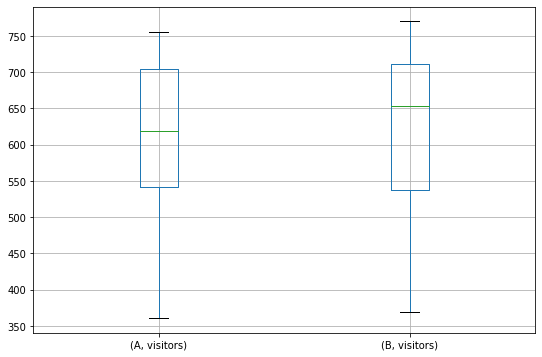

In [12]:
#посмотрим, есть ли выбросы в столбце с количеством посетителей в день
visitors.groupby('group').boxplot('visitors', figsize=(9, 6));


In [13]:
visitors.groupby('group')['visitors'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,31.0,604.387097,112.396227,361.0,541.0,619.0,705.0,756.0
B,31.0,610.193548,118.156230,369.0,537.0,654.0,711.0,770.0


Аномальных выбросов не наблюдаем. 

In [14]:
#загрузим таблицу с данными заказов
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [16]:
#Переведем в нижний регистр названия столбцов
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [17]:
# изменим тип данных в столбце date
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null datetime64[ns]
revenue           1197 non-null int64
group             1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [18]:
#Посмотрим на описательные статистики для выявления выбросов
orders.groupby('group')['revenue'].describe(percentiles =[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
group,,,,,,,,,,,
A,557.0,7333.578097,11847.549587,50.0,1188.0,3000.0,8280.00,17990.0,26718.00,62764.40,93940.0
B,640.0,9230.875000,52449.772189,50.0,1312.5,2965.0,8355.25,18473.3,28787.45,55579.06,1294500.0


Видим, что 5% заказов в обеих группах - аномально высокой стоимости. На данном этапе данные оставим сырыми и очистим по ходу дальнейшего анализа

#### 2.2. Построим график кумулятивной выручки по группам

In [19]:
#Создадим дата фрейм с уникальными парами значений дат и групп теста из таблицы orders
datesgroups = orders[['date','group']].drop_duplicates()
datesgroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Далее соберем агрегированные кумулятивные данные о заказах по дням

In [20]:
#Объявим переменную orders_aggregated, которая содержит дату, группу A/B-теста, число уникальных 
#заказов в группе теста по указанную дату включительно, число уникальных пользователей, совершивших 
#хотя бы 1 заказ в группе теста по указанную дату включительно, суммарную выручку заказов в группе 
#теста по указанную дату включительно.
orders_aggregated = datesgroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [21]:
#Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
#visitors_aggregated, содержащую дату; группу A/B-теста;количество  посетителей в группе 
#теста по указанную дату включительно.
visitors_aggregated = datesgroups.apply(lambda x:visitors[np.logical_and(visitors['date']<=x['date'],
visitors['group']==x['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1).sort_values(by=['date','group'])
visitors_aggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [22]:
#Объединим кумулятивные данные по дате и группе в одной таблицу и присвоим новые названия столбцов
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], 
                                          right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [23]:
#Объявим переменные cumulative_revenue_a и cumulative_revenue_b, в которых сохраним данные о датах, 
#выручке и числе заказов в группах A и B
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date', 'revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date', 'revenue', 'orders']]
cumulative_revenue_a.head()
cumulative_revenue_b.head()

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


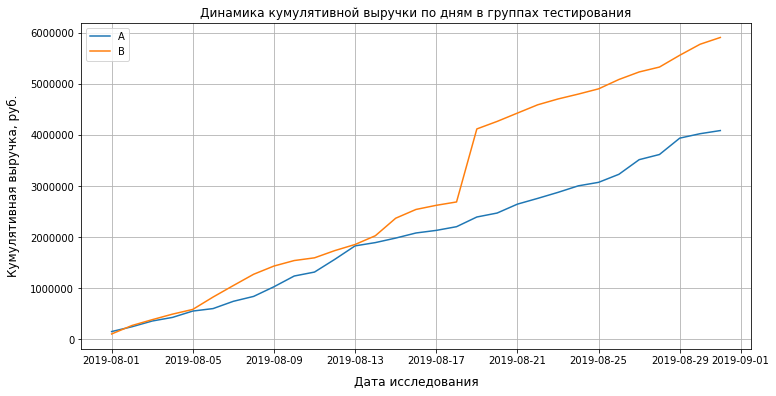

In [24]:
#построим график кумулятивной выручки по дням по группам
plt.figure(figsize=(12, 6));
plt.grid();
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A');
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B');
plt.title("Динамика кумулятивной выручки по дням в группах тестирования");
plt.xlabel('Дата исследования', fontsize=12, labelpad=10);
plt.ylabel('Кумулятивная выручка, руб.', fontsize=12, labelpad=10);
plt.legend();



Кумулятивная выручка контрольной группы увеличивается с течением времени линейно. Однако в одном месте на графике произошел небольшой скачок. Это или увеличение количества заказов (всплеск) и, соответственно, выручки или появление аномально дорогих заказов - выбросы. В тестируемой группе Б в начале исследования график кумулятивной выручки повторяет контрольный, но на четвертый день исследуемого периода начинается рост кумулятивной выручки в тестируемой группе, и в середине исследования случается резкий скачок вверх, что также наводит на мысль о всплеске или выбросе. В дальнейшем, мы эту гипотезу проверим. 

#### 2.3. Построим график кумулятивного среднего чека по группам.

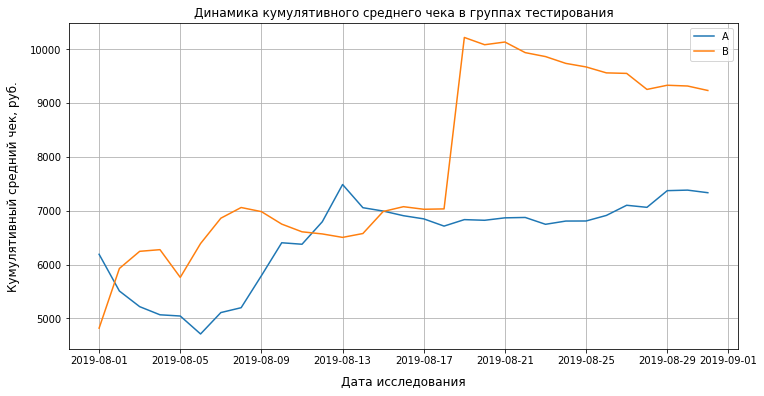

In [25]:
#Средний чек посчитаем как отношение кумулятивной выручки к кумулятивному количеству заказов и
# построим графики
plt.figure(figsize=(12, 6));
plt.grid();
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], 
         label='A');
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], 
         label='B');
plt.title("Динамика кумулятивного среднего чека в группах тестирования");
plt.xlabel('Дата исследования', fontsize=12, labelpad=10);
plt.ylabel('Кумулятивный средний чек, руб.', fontsize=12, labelpad=10);
plt.legend();


Визуальный анализ данных графиков позволяет сделать два предположения: 1) средний чек в тестируемой группе В
преимущественно превышает средний чек контрольной группы А; 2) в обеих экспериментальных группах наблюдаются выбросы значений стоимости заказа, которые оказывают влияние на средний чек и от которых мы избавимся после разностороннего анализа сырых данных. В контрольной группе аномалии случились 13-08-2019, а в тестируемой группе 20-08-2019. Эти предположения подкрепляются и предыдущими исследованиями в нашем проекте. 

#### 2.4. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

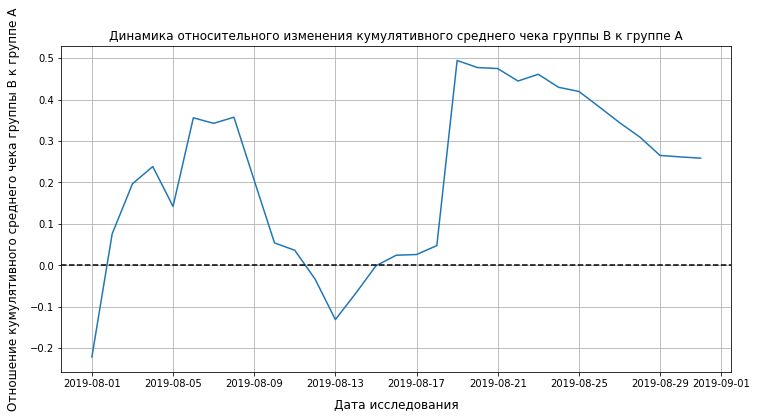

In [26]:
#соберем кумулятивные данные в одном датафрейме и построим график отношения средних чеков, добавив
#горизонтальную ось методом axhline()

merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', 
                                                right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 6));
plt.grid();
plt.plot(merged_cumulative_revenue['date'], 
        (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(
         merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1);
plt.axhline(y=0, color='black', linestyle='--');
plt.title("Динамика относительного изменения кумулятивного среднего чека группы B к группе A");
plt.xlabel('Дата исследования', fontsize=12, labelpad=10);
plt.ylabel('Отношение кумулятивного среднего чека группы B к группе A', fontsize=12, labelpad=10);



Еще одно подтверждение того, что средний чек в группе B преимущественно выше среднего чека в группе А. Причем 13 августа и 19 августа были резкие скачки по причине аномально дорогих заказов (в первую дату - в группе A, во вторую дату - в группе В). Как влияют на эту разницу аномально дорогие заказы и будет ли эта разница статистически значима, исследуем ниже. 

#### 2.5. Построим график кумулятивной конверсии по группам

In [27]:
#добавим столбец с кумулятивной конверсией в датафрейм cumulative_data
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


In [28]:
#выделим в отдельные датафреймы группы А и B
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

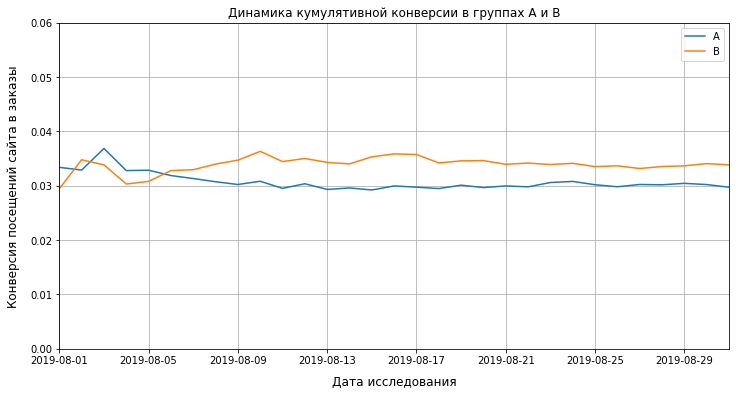

In [29]:
#строим графики и делаем выводы
plt.figure(figsize=(12, 6));
plt.grid();
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A');
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B');

plt.title("Динамика кумулятивной конверсии в группах А и B");
plt.xlabel('Дата исследования', fontsize=12, labelpad=10);
plt.ylabel('Конверсия посещений сайта в заказы',fontsize=12, labelpad=10);
plt.legend();
plt.axis(['2019-08-01', '2019-08-31', 0, 0.060]);

Мы видим, что в первые пять дней наблюдения кумулятивная конверсия контрольной группы А была больше чем исследуемой группы B, однако, с шестого дня исследования конверсия исследуемой группы начинает увеличиваться и растет на протяжении пяти дней, в это же время конверсия контрольной группы снижается. Затем в обеих группах конверсия фиксируется у некоторого значения и далее до конца исследования меняется незначительно, графики идут параллельно друг другу. Предполагаем, что нововведение, применнное к тестируемой группе B возымело положительный эффект и увеличило конверсию визитов в заказы на стабильно более высоком уровне чем в контрольной группе А, в которой с пользователями взаимодействовали по старой схеме. 

#### 2.6. Построим график относительного изменения кумулятивной конверсии группы B к группе A.

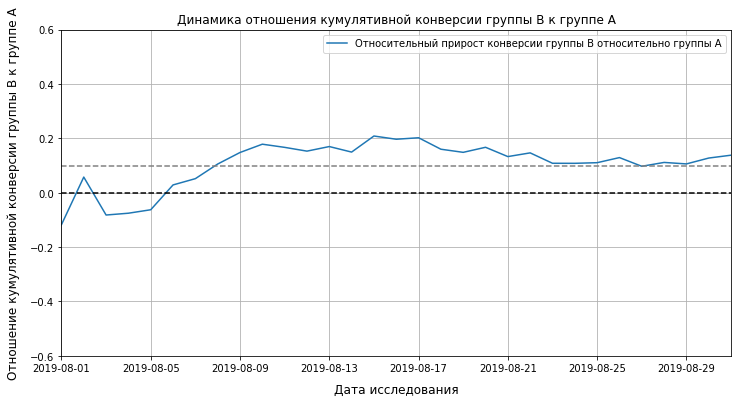

In [30]:
#Объединим датафреймы, полученные в предыдущем пункте нашего исследования
merged_сumulative_сonversion = cumulative_data_a[['date','conversion']].merge(
cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', 
suffixes=['A', 'B'])
plt.figure(figsize=(12, 6));
plt.grid();
plt.plot(merged_сumulative_сonversion['date'], merged_сumulative_сonversion['conversionB']/merged_сumulative_сonversion['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title("Динамика отношения кумулятивной конверсии группы B к группе A");
plt.xlabel('Дата исследования', fontsize=12, labelpad=10);
plt.ylabel('Отношение кумулятивной конверсии группы B к группе A',fontsize=12, labelpad=10);
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.6, 0.6]);

Вначале исследования группа B показывала худшие результаты, чем контрольная группа А, но уже через неделю вышла в лидеры по количеству заказов на пользователей сайта и закрепила позиции на весь период исследования.

Помня о том, что у нас были аномальные заказы по стоимости, посмотрим, как изменятся наши результаты, когда мы почистим данные.

#### 2.7. Анализ количества заказов по пользователям. 

Построим точечный график количества заказов по пользователям. 

In [31]:
#Вспомним, как выглядел наш датафрейм orders
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [32]:
# Посчитаем, сколько заказов приходится на одного пользователя
orders_by_visitors = orders.drop(['group', 'revenue', 'date'], axis=1).groupby(
    'visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})

orders_by_visitors.columns=['visitor_id', 'orders']

orders_by_visitors.sort_values(by='orders',ascending=False).head()

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


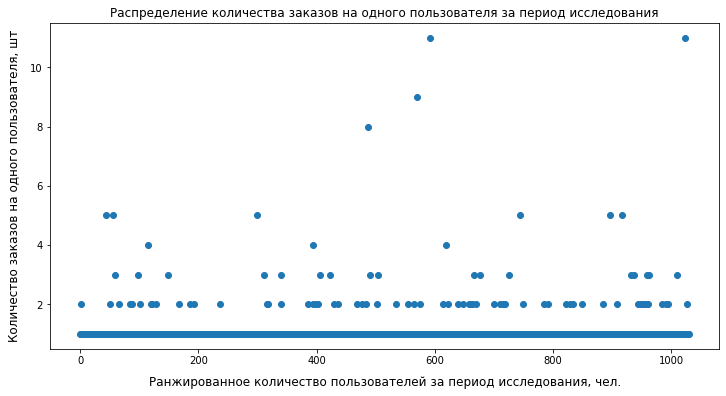

In [33]:
#Построим точечную диаграмму числа заказов на одного пользователя:
x_values = pd.Series(range(0,len(orders_by_visitors)))
plt.figure(figsize=(12, 6));
plt.scatter(x_values, orders_by_visitors['orders']);
plt.xlabel('Ранжированное количество пользователей за период исследования, чел.', fontsize=12, labelpad=10);
plt.ylabel('Количество заказов на одного пользователя, шт',fontsize=12, labelpad=10);
plt.title('Распределение количества заказов на одного пользователя за период исследования');

In [34]:
#Посмотрим на описательные статистики и выборочные персентили: 
orders_by_visitors['orders'].describe(percentiles =[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    1031.000000
mean     1.161009   
std      0.724919   
min      1.000000   
25%      1.000000   
50%      1.000000   
75%      1.000000   
90%      1.000000   
95%      2.000000   
99%      4.000000   
max      11.000000  
Name: orders, dtype: float64

Видим, что 90% пользователей совершают 1 заказ, лишь 10% пользователей совершают 2 и более заказа, и Считаем, что можем оставить на верхней границе 2 заказа, это 95% пользователей. Все остальные считаем выбросами и удалим на следующем этапе исследования.

#### 2.8. Анализ количества заказов по их стоимостям

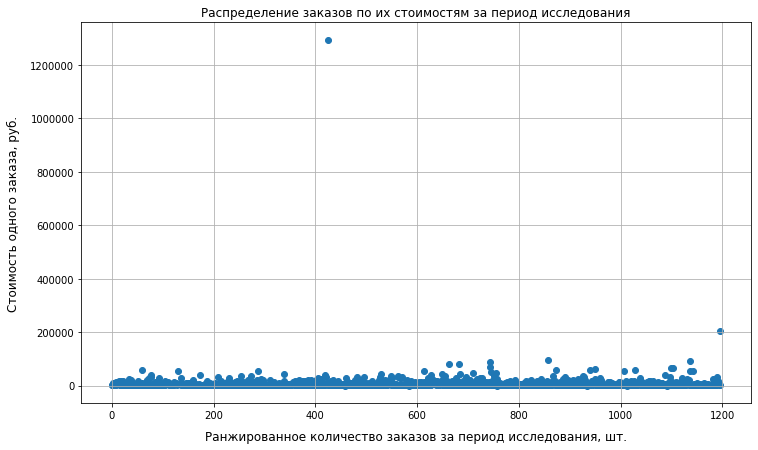

In [35]:
#Построим точечный график
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12, 7));
plt.grid();
plt.scatter(x_values, orders['revenue']);
plt.xlabel('Ранжированное количество заказов за период исследования, шт.', fontsize=12, labelpad=10);
plt.ylabel('Стоимость одного заказа, руб.',fontsize=12, labelpad=10);
plt.title('Распределение заказов по их стоимостям за период исследования');

Мы обнаружили одинокие два супер аномальных заказа стоимостью около 200 000 и выше 1 млн. рублей. 
От  них нужно однозначно избавиться, потому что они вносят существенные коррекции в наши результаты

In [36]:
#Посмотрим описательные статистики и разные процентили среднего чека в выборке по двум группам. 
orders['revenue'].describe(percentiles =[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
90%      1.816800e+04
95%      2.800000e+04
99%      5.823320e+04
max      1.294500e+06
Name: revenue, dtype: float64

Мы видим, что до 1% заказов были стоимостью больше 62764 руб., а до 5% заказов - стоимостью больше 28787 руб. При этом медианный чек по двум выборкам колеблется в пределах 3000 руб. От верхних 5% аномально дорогих заказов будем избавляться на последцющих этапах. 

#### 2.9. Статистическая значимость различий в конверсии между группами A и B по «сырым» данным

In [37]:
#Подготовим данные. Для начала вспомним, как выглядел исходныq датафрейм visitors
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [38]:
#Выделим из выборки visitors контрольную группу A visitors_a_daily 
visitors_a_daily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']
visitors_a_daily.head()

,date,visitors_per_date_a
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [39]:
#посчитаем кумулятивные по дням данные о количестве посетителей интернет-магазина
visitors_a_cumulative = visitors_a_daily.apply(
lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
{'date':'max', 'visitors_per_date_a':'sum'}), axis=1)
visitors_a_cumulative.columns = ['date', 'visitors_cumulative_a']
visitors_a_cumulative.head()

,date,visitors_cumulative_a
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [40]:
#Проделаем те же шаги с тестируемой группой B
visitors_b_daily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']
visitors_b_cumulative = visitors_b_daily.apply(
lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
{'date':'max', 'visitors_per_date_b':'sum'}), axis=1)
visitors_b_cumulative.columns = ['date', 'visitors_cumulative_b']
visitors_b_cumulative.head()

,date,visitors_cumulative_b
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [41]:
#Вспомним исходный датафрейм orders
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [42]:
#По аналогии с данными таблицы visitors выделим из общей выборки orders группы A и B и посчитаем 
#кумулятивное число заказов и кумулятивную стоимость отдельно по группам A и B
orders_a_daily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cumulative = orders_a_daily.apply(
    lambda x: \
        orders_a_daily[orders_a_daily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'orders_per_date_a' : 'sum',
                'revenue_per_date_a' : 'sum'}), axis=1).sort_values(by=['date'])
orders_a_cumulative.columns = ['date', 'orders_cumulative_a', 'revenue_cumulative_a']

orders_b_daily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cumulative = orders_b_daily.apply(
    lambda x: \
        orders_b_daily[orders_b_daily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'orders_per_date_b' : 'sum',
                'revenue_per_date_b' : 'sum'}), axis=1).sort_values(by=['date'])
orders_b_cumulative.columns = ['date', 'orders_cumulative_b', 'revenue_cumulative_b']
orders_b_cumulative.head()

,date,orders_cumulative_b,revenue_cumulative_b
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [43]:
#объединим все полученные таблицы из датафреймов visitors и orders
data = orders_a_daily.merge(orders_b_daily, left_on='date', right_on='date', how='left')\
    .merge(orders_a_cumulative, left_on='date', right_on='date', how='left')\
    .merge(orders_b_cumulative, left_on='date', right_on='date', how='left')\
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')\
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')\
    .merge(visitors_a_cumulative, left_on='date', right_on='date', how='left')\
    .merge(visitors_b_cumulative, left_on='date', right_on='date', how='left')
data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cumulative_a,revenue_cumulative_a,orders_cumulative_b,revenue_cumulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cumulative_a,visitors_cumulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [44]:
#Посчитаем статистическую значимость различия в конверсии между группами.Создадим переменные 
#orders_by_users_a и orders_by_users_b со столбцами ['visitor_id', 'orders']. В них для пользователей, которые 
#заказывали хотя бы 1 раз, укажем число совершённых заказов.

orders_by_users_a = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg(
    {'transaction_id' : pd.Series.nunique})
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg(
    {'transaction_id' : pd.Series.nunique})
orders_by_users_b.columns = ['visitor_id', 'orders']
orders_by_users_b.head()


,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Как мы выяснили ранее, в наших данных присутствуют аномально большие выбросы стоимостей и количества заказов, которые оказывают существенное влияние на алгебраические метрики, тем самым искажая результаты исследования. Поэтому в отношении наших выборок мы будем использовать непараметрический тест Манна-Уитни, основанный на ранжировании выборок, для оценки статистической значимости различий. 
Нулевая гипотеза, как принято, говорит о равенстве двух сравниваемых выборок. Проверим эту гипотезу.

In [45]:
#Для подготовки к проверке с помощью критерия Манна-Уитни объявим переменные sample_a и sample_b, 
#в которых пользователям из разных групп будет соответствовать количество заказов. 
#Тем, кто ничего не заказал, будут соответствовать нули. Т.е. в этих переменных число элементов - 
#это количество пользователей, сумма всех элементов — количество заказов. 
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(
    data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(
0, index=np.arange(data['visitors_per_date_b'].sum() - len(
    orders_by_users_b['orders'])), name='orders')],axis=0)
sample_b.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [46]:
# Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой.

"{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1])

'0.008'

#### Значение p-value 0.008 меньше порогового 0.05, значит нулевую гипотезу  о том, что статистически значимых различий в конверсии между группами нет - отвергаем. Различия есть!

In [47]:
#Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. 
# Округлим до трёх знаков после запятой.
"{0:.3f}".format(sample_b.mean()/sample_a.mean()-1)

'0.138'

#### Относительное различие конверсий между контрольной группой А и тестируемой группой B составляют 13.8%

#### 2.10. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Наша нулевая гипотеза: различий в среднем чеке нет. Альтернативная гипотеза: средний чек исследуемой группы B больше, чем средний чек контрольной группы A. Проверим нашу гипотезу.

In [48]:
#Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, 
#передадим критерию mannwhitneyu() данные о выручке с заказов. 
"{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                    orders[orders['group']=='B']['revenue'])[1])

'0.365'

P-value больше 0.05 и составляет 0.365. Нулевая гипотеза об отсутствии различий в среднем чеке не отвергаем. С вероятностью 36.5% различия в среднем чеке являются случайностью. Итог проверки: Средний чек контрольной и исследуемой групп не различается. 

In [49]:
#Найдём относительные различия в среднем чеке между группами
"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A'][
    'revenue'].mean()-1)

'0.259'

Относительное различие в среднем чеке сырых данных присутствует, причем средний чек группы B почти на 26% больше, чем средний чек контрольной группы. Но разница эта статистически недостоверна по причине наличия аномально дорогих заказов, которые оказывают существенное влияния на средние значения.

#### 2.11. Посчитаем статистическую значимость различий в конверсии и в среднем чеке между группами по «очищенным» данным

Выше в нашем исследовании мы нашли, что 95 и 99 персентиль средних чеков равны соответственно 28000 и 58000 руб., а 95 и 99 персентиль количества заказов равны соответственно 2 и 4. 
Мы определились, что будем удалять 5% пользователей с наибольшем количеством заказов (больше 2) и 5% пользователей с самыми дорогими заказами (больше 28000 рублей)

In [50]:
#Сделаем срезы пользователей с числом заказов больше 2 — users_with_many_orders и пользователей, 
#совершивших заказы дороже 28 000 — users_with_expensive_orders. Объединим их в таблице abnormal_users
users_with_many_orders = pd.concat([orders_by_users_a[orders_by_users_a['orders'] > 2]['visitor_id'], 
                        orders_by_users_b[orders_by_users_b['orders'] > 2]['visitor_id']], axis = 0)
users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values()
abnormal_users.head(5)


1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64

In [51]:
#Узнаем, сколько всего аномальных пользователей методом shape().
abnormal_users.shape

(74,)

In [52]:
visitors['visitors'].sum()

37652

Всего 74 "аномальных" пользователя в выборке из 37652 пользователей. Посмотрим, как они влияют на результаты нашего теста: посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.
Нулевая гипотеза (H0): В очищенных данных конверсии в группах A и B не различаются. 
Альтернативная гипотеза (H1): В очищенных данных конверсии в группах A и B различаются, причем конверсия в группе B больше чем конверсия в группе A.

In [53]:
 
#Сначала подготовим выборки количества заказов по пользователям по группам теста
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['visitor_id'].
isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - 
len(orders_by_users_a['orders'])),name='orders')],axis=0)

sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['visitor_id'].
isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - 
len(orders_by_users_b['orders'])),name='orders')],axis=0)

In [54]:
#Применим статистический критерий Манна-Уитни к полученным выборкам:
"{0:.3f}".format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1])


'0.007'

В очищенных данных значение критерия Манна-Уитни мало изменилось применительно к конверсии. Нулевую гипотезу отвергаем, различия в конверсиях между группами A и B присутствуют! 

In [55]:
#Посмотрим на относительное различие в конверсиях
"{0:.3f}".format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)

'0.173'

В очищенных данных относительное изменение конверсии увеличилось почти на 4% в сравнении с сырыми данными и составляет 17%, то есть группа B при очистке данных показала еще большее различие по отношению к группе A.

Посмотрим на результаты по среднему чеку после очистки данных.
Нулевая гипотеза (H0): В очищенных данных средние чеки в группах A и B не различаются. 
Альтернативная гипотеза (H1): В очищенных данных средние чеки не равны, причем средний чек в группе B меньше среднего чека в группе A.

In [56]:
"{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1])



'0.369'

Значение p-value = 0.369, что превышает пороговое значение 0.05. Это означает, что с вероятностью 36.9% разница в средних чеках по очищенным данным является случайностью и не является статистически значимой. Мы подтверждаем нулевую гипотезу о равенстве средних чеков.

In [57]:
#найдем относительные различия в среднем чеке между группами по очищенным данным
"{0:.3f}".format(
orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].
isin(abnormal_users)))]['revenue'].mean()/orders[np.logical_and(orders['group']=='A',
np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean() - 1)

'-0.020'

В очищенных данных средний чек исследуемой группы B на 2% меньше, чем в контрольной группе A. Однако эти различия не можем признать статистически значимыми, поскольку p-value больше 0.05. То есть статистически значимых различий в средних чеках нет. 

### Выводы по результатам приоритезации гипотез и A/B теста

#### 1) Наша приоритетная гипотеза для увеличения выручки интернет- магазина - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Для проверки этой гипотезы мы запустили A/B тест

#### 2) Результаты теста показали, что между группами А и B присутствует статистически значимая конверсия как в "сырых" так и в очищенных данных. Пользователи из исследуемой группы B совершают заказов больше на 17%, чем пользователи из контрольной группы.

#### 3) Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий

#### 4) График различия конверсии между группами показывает, что уже через неделю после начала тестирование группа B обогнала контрольную группу A в отношении кумулятивной конверсии и сохранила лидерство до конца тестирования

#### 5) Динамика изменения кумулятивного среднего чека на основе "сырых" данных указывает на преимущество  группы B. Средний чек на 26% больше, чем в контрольной группе. Очистка данных привела к существенному снижению среднего чека группы B - он стал даже меньше, чем в группе A. Однако разница в средних чеках не является статистически значимой ни в сырых, ни в очищенных данных. Проще говоря - этой разницы в исследуемых группах нет. 

#### 6) Наша приоритетная гипотеза по увеличению выручки не влияет на средний чек, но влияет на конверсию. Наш A/B тест останавливаем, считаем его успешным и перейдем к проверке следующей гипотезы, согласно результатам применения фреймворка RICE